In [ ]:
# Capstone Project Python
# Project Title: Laptop Price Prediction for SmartTech Co.

In [ ]:
# Objectives:

# Accurate Pricing: Build a model to predict laptop prices based on key features.
# Market Positioning: Identify how features influence pricing for better product strategy.
# Brand Influence: Analyze brand impact on price to understand market perception.

In [ ]:
# Loads the laptop.csv file into a DataFrame named df using pandas.
df = pd.read_csv('/content/laptop.csv')

In [ ]:
 # Importing essential Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Displays the first five rows of the DataFrame df
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# dataset shape ---(Returns the number of rows and columns in the dataset as a tuple — (rows, columns).)
df.shape

(1303, 13)

In [ ]:
# dataset information---(Displays summary information about the dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# Column names----(Display a list-like object containing the names of all columns in the DataFrame.)
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
df= df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# Check for missing values---(Display the total number of missing (null) values in each column of the DataFrame.)
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [ ]:
# Drop missing values--- (Removes all rows with missing values from the DataFrame and updates df with the cleaned data.
df= df.dropna()

In [ ]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
# Duplicated sum ---(Returns the total number of duplicate rows in the DataFrame.)
df.duplicated().sum()

np.int64(29)

In [ ]:
# Drop Duplicated values---(Dropping the total number of duplicate rows in the DataFrame)
df= df.drop_duplicates()

In [ ]:
#Checking final shape of data after removing null vales and duplicates
df.shape

(1242, 11)

In [ ]:
# Handling NAN values(?)

import numpy as np
# Handle 'Inches'
df['Inches'] = df['Inches'].replace('?', np.nan)
df = df.dropna(subset=['Inches'])
df['Inches'] = df['Inches'].astype(float)


In [ ]:
# 2. Clean 'Ram'

df['Ram'] = df['Ram'].replace('?', np.nan)
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False).str.strip()
df['Ram'] = df['Ram'].astype(float).astype(int)

In [ ]:
df['Weight'] = df['Weight'].replace('?', np.nan)

# Convert to string first, then clean
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False).str.strip()

# Replace 'nan' strings back to actual NaN
df['Weight'] = df['Weight'].replace('nan', np.nan).astype(float)

In [ ]:
#Drop NAN(Not a number) missing values from a dataframe
df.dropna
df.dropna(inplace=True)

In [ ]:
import pandas as pd

def split_memory(mem):
    mem = mem.replace('GB', '').replace('TB', '000')
    parts = mem.split('+')
    ssd = hdd = 0
    for part in parts:
        if 'SSD' in part:
            ssd = int(''.join(filter(str.isdigit, part)))
        elif 'HDD' in part:
            hdd = int(''.join(filter(str.isdigit, part)))
    return pd.Series([ssd, hdd])

df[['SSD', 'HDD']] = df['Memory'].apply(split_memory)
df.drop(columns='Memory', inplace=True)

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price', 'SSD', 'HDD'],
      dtype='object')

In [ ]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,256,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,512,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,500
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,128,0
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,512,0
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1242 non-null   object 
 1   TypeName          1242 non-null   object 
 2   Inches            1242 non-null   float64
 3   ScreenResolution  1242 non-null   object 
 4   Cpu               1242 non-null   object 
 5   Ram               1242 non-null   int64  
 6   Gpu               1242 non-null   object 
 7   OpSys             1242 non-null   object 
 8   Weight            1242 non-null   float64
 9   Price             1242 non-null   float64
 10  SSD               1242 non-null   int64  
 11  HDD               1242 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 126.1+ KB


(1242, 12)

In [ ]:
# Display all the columns with object (categorical/text) columns in the DataFrame.
print(df.describe(include=['object']))

       Company  TypeName   ScreenResolution                         Cpu  \
count     1242      1242               1242                        1242   
unique      19         6                 40                         118   
top     Lenovo  Notebook  Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
freq       282       689                491                         183   

                          Gpu       OpSys  
count                    1242        1242  
unique                    110           9  
top     Intel HD Graphics 620  Windows 10  
freq                      269        1020  


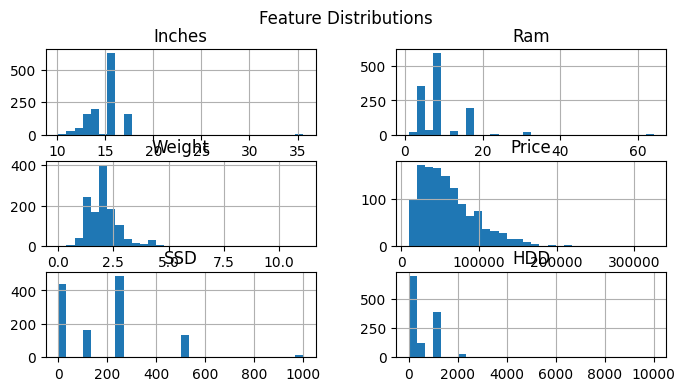

In [ ]:
#Histogram(Distribution of data, How the data is distribute from the Avegare) for numerical columns

df.hist(figsize=(8,4), bins=30)
plt.suptitle("Feature Distributions", fontsize=12)
plt.show()

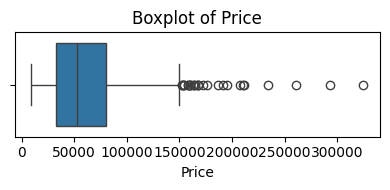

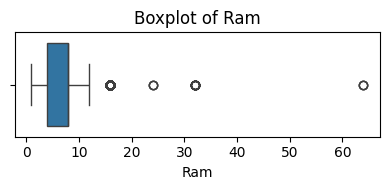

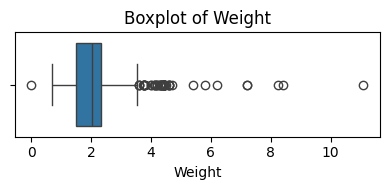

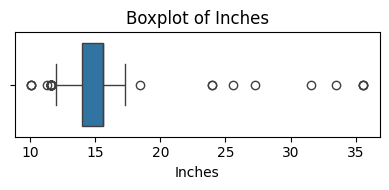

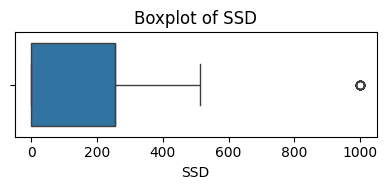

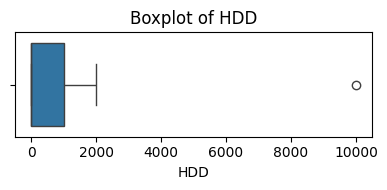

In [ ]:
# Boxplot to check for outliers for numerical column(outliers are extreme values that differs from the actual values)
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Price', 'Ram', 'Weight', 'Inches', 'SSD', 'HDD']:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

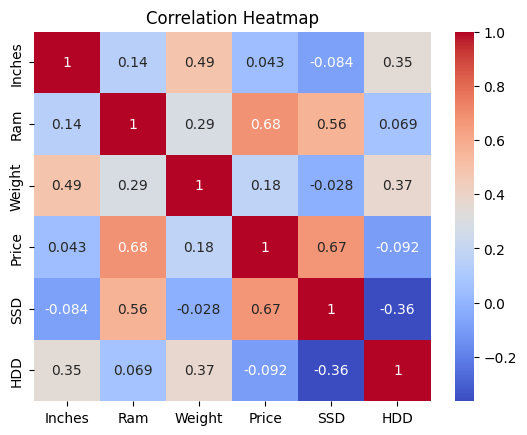

In [ ]:
# Correlation matrix(Correlation heatmap for all numerical columns in the DataFrame)

sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Detect outliers using Z Score, IQR method and Winsorization

In [ ]:
# Detecting outliers using Zscore (To remove outliers)

from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).sum()
print("Outliers detected using Z-score:\n",outliers_z)

Outliers detected using Z-score:
 69


In [ ]:
# Detecting outliers using IQR (To remove outliers)
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)


Outliers detected using IQR:
 Inches     43
Ram       215
Weight     55
Price      28
SSD        15
HDD         1
dtype: int64


In [ ]:
 #Removing Outliers Using IQR

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Consider only numerical columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_mask = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Filter out outliers
df_cleaned = df[~outliers_mask.any(axis=1)]

print("Original Data Shape:", df.shape)
print("Outlier Removal using ZScore:", df_cleaned.shape)

Original Data Shape: (1242, 12)
Outlier Removal using ZScore: (969, 12)


In [ ]:
# Outliers using Winsorization (Retaining Outliers)

from scipy.stats.mstats import winsorize

df_winsor = df.copy()

# Apply Winsorization to numerical columns (capping extreme values at 5% and 95%)
for col in df.select_dtypes(include=['number']).columns:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Original Data Shape:", df.shape)
print("Retaing outliers using Winsorization:", df_winsor.shape)

Original Data Shape: (1242, 12)
Retaing outliers using Winsorization: (1242, 12)


In [ ]:
# Feature Scaling is used in data preprocessing to make all features (columns) have a similar range.
# 1.MinMaxScaler
# 2.StandardScaler
# 3.RobustScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Create separate copies of the dataset for each scaling method
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

# Selecting only numerical columns for scaling
num_cols = df.select_dtypes(include=['number']).columns

# Min-Max Scaling (0 to 1 Range)
minmax_scaler = MinMaxScaler()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

# Standard Scaling (Mean = 0, Std = 1)
standard_scaler = StandardScaler()
df_standard[num_cols] = standard_scaler.fit_transform(df_standard[num_cols])

# Robust Scaling (Uses Median=0 & IQR=1 – Good for Outliers)
robust_scaler = RobustScaler()
df_robust[num_cols] = robust_scaler.fit_transform(df_robust[num_cols])


In [ ]:
# Visualizing the different Scalers

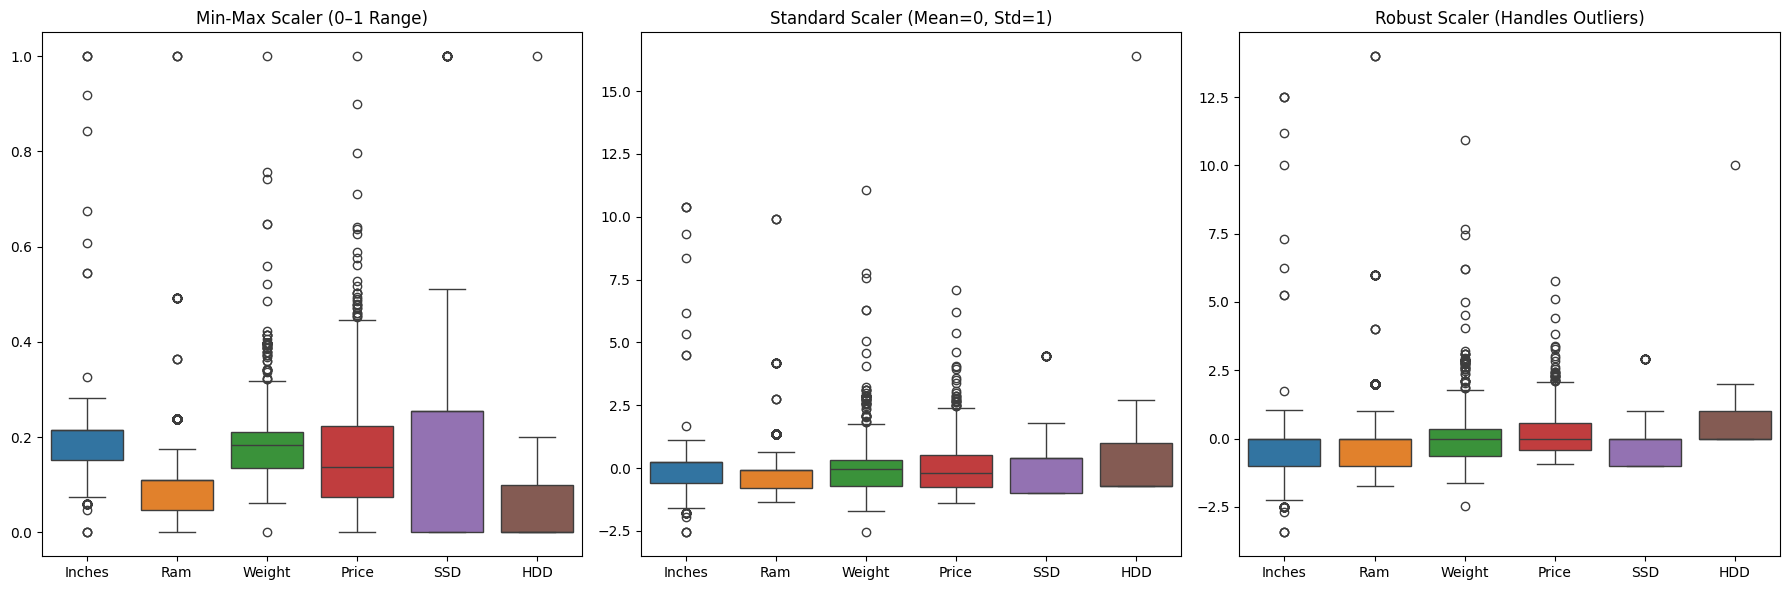

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Min-Max Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0–1 Range)")

# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")

plt.tight_layout()
plt.show()

In [ ]:
# Encoding--(Converting categorical (text) data into numerical values so that machine learning algorithms can understand and use it.)
# Label encoding and one hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Label Encoding(Converts categories to numbers (e.g., Red → 0, Blue → 1, Green → 2))
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

    # Display results
print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

Label Encoded Data:
   Company  TypeName  Inches  ScreenResolution  Cpu  Ram  Gpu  OpSys  Weight  \
0        1         4    13.3                23   65    8   58      8    1.37   
1        1         4    13.3                 1   63    8   51      8    1.34   
2        7         3    15.6                 8   74    8   53      4    1.86   
3        1         4    15.4                25   85   16    9      8    1.83   
4        1         4    13.3                23   67    8   59      8    1.37   

         Price  SSD  HDD  
0   71378.6832  128    0  
1   47895.5232    0    0  
2   30636.0000  256    0  
3  135195.3360  512    0  
4   96095.8080  256    0  

Unique Values in Each Column:
(1242, 12)


In [ ]:
# One_hot_encoding-----Creates new binary columns for each category.
df_one_hot_encoded = pd.get_dummies(df,columns=cat_cols, drop_first=True)

In [ ]:
print("\none hot encoded Data:")
print(df_one_hot_encoded.head())
print(df_one_hot_encoded.shape)


one hot encoded Data:
   Inches  Ram  Weight        Price  SSD  HDD  Company_Apple  Company_Asus  \
0    13.3    8    1.37   71378.6832  128    0           True         False   
1    13.3    8    1.34   47895.5232    0    0           True         False   
2    15.6    8    1.86   30636.0000  256    0          False         False   
3    15.4   16    1.83  135195.3360  512    0           True         False   
4    13.3    8    1.37   96095.8080  256    0           True         False   

   Company_Chuwi  Company_Dell  ...  Gpu_Nvidia Quadro M620  \
0          False         False  ...                   False   
1          False         False  ...                   False   
2          False         False  ...                   False   
3          False         False  ...                   False   
4          False         False  ...                   False   

   Gpu_Nvidia Quadro M620M  OpSys_Chrome OS  OpSys_Linux  OpSys_Mac OS X  \
0                    False            False        Fa

In [ ]:
import numpy as np
import pandas as pd

# Drop rows with NaNs before scaling
x = df_label_encoded.drop(columns=['Price'])     # Features (all columns except 'Price')
y = df_label_encoded['Price']                    # Target variable (Price)

x = x.dropna()                                   # Removes rows with NaNs in the feature set
y = y.loc[x.index]                               # Keeps only those rows in y that match the remaining x rows

In [ ]:
df_label_encoded = df_label_encoded.dropna()    #Removes all rows with any missing (NaN) values from the

In [ ]:
df_label_encoded['Weight'] = df_label_encoded['Weight'].fillna(df_label_encoded['Weight'].mean()) #missing values in the 'Weight' column with the mean (average) weight from the df_label_encoded DataFrame.

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting data into features and target
x = df_label_encoded.drop(columns=['Price'])
y = df_label_encoded['Price']

# Importing all important regression models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [ ]:
# Linear Regression ( Linear Regression model that learns the relationship between the scaled features (x_train_scaled) and the target (y_train), so it can predict laptop prices.)
# Target variable — Price — is a continuous numerical value not a category.
liner_model = LinearRegression()
liner_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predicting on test data(Model evaluation metrics)
test_pred_linear = liner_model.predict(x_test_scaled)

# Importing metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Calculating Mean Squared Error
mse = mean_squared_error(test_pred_linear, y_test)
print("mse:", mse)
rmse = sqrt(mse)
print("rmse:", rmse)
r2 = r2_score(test_pred_linear, y_test)
print("R² Score:", r2)

mse: 463567905.4641062
rmse: 21530.62714980932
R² Score: 0.5262095661530366


In [ ]:
# SVR Model

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Initialize and train the model
svr = SVR(kernel='rbf')
svr.fit(x_train_scaled, y_train)

# Make predictions
test_pred_svr = svr.predict(x_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(test_pred_svr, y_test)
print("mse:", mse)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)
print("rmse:", rmse)

# Calculate R² Score
r2 = r2_score(test_pred_svr, y_test)
print("R² Score:", r2)

mse: 1135743482.1725457
rmse: 33700.79349470195
R² Score: -457394.01993031695


In [ ]:
# KNN Regressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

# Make predictions
test_pred_knn = knn.predict(x_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(test_pred_knn, y_test)
print("mse:", mse)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)
print("rmse:", rmse)

# Calculate R^2 Score
r2 = r2_score(y_test, test_pred_knn)
print("R² Score:", r2)

mse: 274961935.99269575
rmse: 16581.976239058353
R² Score: 0.7565833257385074


In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions
test_pred_dt = dt_model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(test_pred_dt, y_test)
print("MSE:", mse)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)
print("RMSE:", rmse)

# Calculate R² Score
r2 = r2_score(y_test, test_pred_dt)
print("R² Score:", r2)

MSE: 337137516.12350315
RMSE: 18361.304858955507
R² Score: 0.7015408963888605


In [ ]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
test_pred_rf = rf_model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(test_pred_rf, y_test)
print("MSE:", mse)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)
print("RMSE:", rmse)

# Calculate R² Score
r2 = r2_score(y_test, test_pred_rf)
print("R² Score:", r2)

MSE: 202591302.3232882
RMSE: 14233.45714586896
R² Score: 0.8206511717056377


In [ ]:
 # Original test feature data, not yet scaled
x_test

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,SSD,HDD
926,10,4,12.5,15,97,8,53,5,1.36,256,0
1032,11,1,17.3,8,102,8,75,5,2.70,128,1000
690,0,3,14.0,0,33,4,45,1,1.45,0,0
638,10,0,13.3,13,97,8,53,5,1.37,256,0
953,2,0,12.5,8,50,8,46,1,1.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...
946,4,4,12.5,7,74,8,40,5,1.36,256,0
1056,7,3,15.6,0,74,4,53,4,1.96,0,500
313,0,3,15.6,8,11,8,17,5,2.23,256,0
614,4,3,15.6,0,78,4,53,2,1.93,0,500


In [ ]:
# Transformed using a scaler (like StandardScaler)
x_test_scaled

array([[ 0.95211019,  1.13776487, -1.11269066, ..., -0.90636364,
         0.37815259, -0.81478898],
       [ 1.2008777 , -1.28363216,  0.87280931, ...,  0.90655924,
        -0.30339454,  1.16455205],
       [-1.53556492,  0.33063253, -0.49222192, ..., -0.78460016,
        -0.98494167, -0.81478898],
       ...,
       [-1.53556492,  0.33063253,  0.1696114 , ...,  0.27068331,
         0.37815259, -0.81478898],
       [-0.54049487,  0.33063253,  0.1696114 , ..., -0.13519495,
        -0.98494167,  0.17488154],
       [-1.0380299 , -2.0907645 ,  0.1696114 , ...,  0.23009548,
        -0.98494167,  1.16455205]])

In [ ]:
# Building a predictive system using Random Forest

import pandas as pd
import numpy as np

feature_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
                 'Gpu', 'OpSys', 'Weight', 'SSD', 'HDD']

data1 = (10.0, 0, 13.3, 13, 97, 8, 53, 5, 1.37, 256,0)
data_df = pd.DataFrame([data1], columns=feature_names)

# Predict
prediction = rf_model.predict(data_df)
print("Predicted Price:", prediction[0])



Predicted Price: 96469.38959999997


In [ ]:
true_price = 93635.3376
error = abs(prediction[0] - true_price)
print("Absolute Error:", error)

Absolute Error: 2834.051999999967


In [ ]:
# Building a predictive system using KNN Model

import pandas as pd
import numpy as np

feature_names = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
                 'Gpu', 'OpSys', 'Weight', 'SSD', 'HDD']

data1 = (10, 0, 13.3, 13, 97, 8, 53, 5, 1.37, 256, 0)
data_df = pd.DataFrame([data1], columns=feature_names)

# Predict
prediction = knn.predict(data_df)
print("Predicted Price:", prediction[0])

Predicted Price: 229585.65119999996


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [ ]:
true_price = 93635.3376
error = abs(prediction[0] - true_price)
print("Absolute Error:", error)

Absolute Error: 135950.31359999996
